In [51]:
import pandas as pd
import seaborn as sb
import numpy as np

                                               PUNTO 1

In [52]:
def intervalo_confianza(duraciones_totales):
    media = np.mean(duraciones_totales)
    valor_z = 2.57
    desvio = np.std(duraciones_totales)
    n = len(duraciones_totales)
    ext_inferior = media - (valor_z * (desvio/(n ** 0.5)))
    ext_superior = media + (valor_z * (desvio/(n ** 0.5)))
    return round(ext_inferior,2), round(ext_superior,2)

In [53]:
def simulacion(cant_minima_stock):
    DIASXAÑO= 250
    MAX_AÑOS = 30
    PRODUCTOS_EN_INVENTARIO = 80
    PRODUCCION_DIARIA = 130 #por cada turno
    COSTO_STOCK = 70 #por producto por dia

    stock_actual = PRODUCTOS_EN_INVENTARIO
    contador_turnos_adicionales = 0
    contador_costo_stock = 0
    turnos_adicionales =[]
    costos_anuales = []
    turnos_diario = 0
    costo_stock_diario = 0

    for i in range(MAX_AÑOS): 
        turnos_diario = 0
        costo_stock_diario = 0
        for j in range(DIASXAÑO):
            contador_turnos_adicionales = 0
            contador_costo_stock = 0
            stock_actual = stock_actual + PRODUCCION_DIARIA
            demanda_diaria = round(np.random.normal(loc=150, scale=25))
            stock_actual = stock_actual - demanda_diaria
            if (stock_actual <= cant_minima_stock):
                contador_turnos_adicionales+=1
                stock_actual = stock_actual + PRODUCCION_DIARIA
            # finaliza el dia
            turnos_diario= turnos_diario + contador_turnos_adicionales
            costo_stock_diario = stock_actual * COSTO_STOCK
        # finaliza el año
        turnos_adicionales.append(turnos_diario)
        costos_anuales.append(costo_stock_diario)

    return turnos_adicionales, costos_anuales

### Resultado para 50 unidades de stock minimo

In [54]:
turnos_adicionales, costos_anuales = simulacion(50)

In [55]:
print(f"El promedio de costo anual es: ${round((sum(x for x in costos_anuales)/len(costos_anuales)),2)}")
print(f"El intervalo de confianza del 99% para los valores de costos anuales es: {intervalo_confianza(costos_anuales)}")

print(f"EL promedio de turnos adicionales anuales es: {round((sum(x for x in turnos_adicionales)/len(turnos_adicionales)),2)} ")
print(f"El intervalo de confianza del 99% para los valores de turnos es: {intervalo_confianza(turnos_adicionales)}")

El promedio de costo anual es: $8565.67
El intervalo de confianza del 99% para los valores de costos anuales es: (7616.36, 9514.98)
EL promedio de turnos adicionales anuales es: 38.9 
El intervalo de confianza del 99% para los valores de turnos es: (37.66, 40.14)


### Resultado para 60 unidades de stock minimo

In [60]:
turnos_adicionales, costos_anuales = simulacion(60)

In [61]:
print(f"El promedio de costo anual es: ${round((sum(x for x in costos_anuales)/len(costos_anuales)),2)}")
print(f"El intervalo de confianza del 99% para los valores de costos anuales es: {intervalo_confianza(costos_anuales)}")

print(f"EL promedio de turnos adicionales anuales es: {round((sum(x for x in turnos_adicionales)/len(turnos_adicionales)),2)} ")
print(f"El intervalo de confianza del 99% para los valores de turnos es: {intervalo_confianza(turnos_adicionales)}")

El promedio de costo anual es: $9230.67
El intervalo de confianza del 99% para los valores de costos anuales es: (7905.13, 10556.21)
EL promedio de turnos adicionales anuales es: 39.07 
El intervalo de confianza del 99% para los valores de turnos es: (37.78, 40.35)


### Resultado para 70 unidades de stock minimo

In [64]:
turnos_adicionales, costos_anuales = simulacion(70)

In [65]:
print(f"El promedio de costo anual es: ${round((sum(x for x in costos_anuales)/len(costos_anuales)),2)}")
print(f"El intervalo de confianza del 99% para los valores de costos anuales es: {intervalo_confianza(costos_anuales)}")

print(f"EL promedio de turnos adicionales anuales es: {round((sum(x for x in turnos_adicionales)/len(turnos_adicionales)),2)} ")
print(f"El intervalo de confianza del 99% para los valores de turnos es: {intervalo_confianza(turnos_adicionales)}")

El promedio de costo anual es: $10430.0
El intervalo de confianza del 99% para los valores de costos anuales es: (9403.22, 11456.78)
EL promedio de turnos adicionales anuales es: 39.37 
El intervalo de confianza del 99% para los valores de turnos es: (37.88, 40.86)


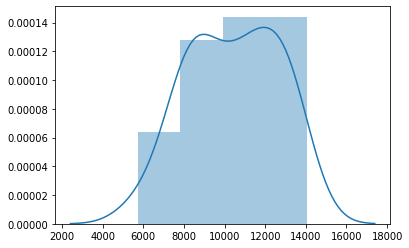

In [68]:
#sb.distplot(turnos_adicionales)
sb.distplot(costos_anuales)

                                            PUNTO 2

In [73]:
def getValorAleatorio(nombre):
    if nombre == "RETARDO_PAPELEO":
        return 1 #todo agrgar la tabla de probabilidades
    elif nombre == "RETARDO_PEDIDO":
        return 1 #todo
    else: #cantidad demanda por dia
        return 1 #TODO

In [88]:
class Evento():
    def __init__(self,nombre, arribo, duracion):
        self.id = _id
        self.nombre = nombre
        self.arribo = arribo
        self.duracion = 0
        self.tiempo_fin = arribo + duracion
        
    def __repr__(self):
        return f"{self.id} - {self.nombre} - arribo: {self.arribo} - duracion: {self.duracion} - termina: {self.tiempo_fin}\n"
    
    
class EventoDemanda(Evento):
    def __init__(self, **kwargs):
        super(Evento, self).__init__(**kwargs)
        self.demanda = getValorAleatorio("DEMANDA")
        
    def __repr__(self):
        return f"{self.id} - {self.nombre} a {self.evento_inicio.id} - inicia: {self.arribo} - duracion: {self.duracion} - termina: {self.tiempo_fin}\n"

In [89]:
def agregarEventoAFel(evento, fel):
    """
    Esta funcion agrega eventos al diccionario fel. Si el diccionario
    tiene eventos en la lista, agrega el evento a la lista existente.
    la clave de la fel es el tiempo de llegada del evento que es un entero
    """
    lista_eventos = fel.get(evento.arribo, None)
    if lista_eventos:
        fel[evento.tiempo_fin].append(evento) #agrego el evento a la lista de eventos existente
    else:
        fel[evento.tiempo_fin]=[evento] #agrego la lista de eventos para ese momento de reloj en la fel

In [90]:
mantenimiento = 450 #por unidad por dia
precio_pedido = 3800 #por orden
precio_faltante = 625 #por unidad
stock = 1500 #unidades a un costo de $950
cantidad_orden = 100
punto_reorden = 15
TIEMPO_SIMULACION = 365 #Son dias equivalentes a un año
reloj = 0
delta = 1
fel = {}

#calculos
costo_por_faltante_diario = 0
costo_por_pedido_diario = 0
costo_por_stock_diario = 0
costo_mantenimiento_diario = 0

for i in range(TIEMPO_SIMULACION):
    e = EventoDemanda(nombre="DEMANDA", arribo=reloj, duracion=0)
    agregarEventoAFel(fe, e)
    eventos_de_hoy = fel[reloj]  
    
    costo_por_faltante = 0
    costo_por_pedido = 0
    costo_por_stock = 0
    costo_mantenimiento = 0

    for evento in eventos_de_hoy:
        
        if evento.nombre == "DEMANDA":
            if (evento.demanda <= stock): #checkea si tengo stock para el pedido
                e = Evento(nombre="RETARDO_PAPELEO",
                                         arribo=reloj,
                                         duracion=getDuracion("RETARDO_PAPELEO"))
                agregarEventoAFel(fe,e)
                stock_actual = stock_actual - evento.demanda
                
            else: #Pedir mas producto
                costo_por_faltante_diario = abs(stock-evento.demanda) * precio_faltante
                e = Evento(nombre="RETARDO_PEDIDO",
                                         arribo=reloj,
                                         duracion=getDuracion("RETARDO_PEDIDO"))
                agregarEventoAFel(fe,e)
                costo_por_pedido_diario = costo_por_pedido_diario + precio_pedido
                
        elif evento.nombre == "RETARDO_PEDIDO": #indica que llego un pedido solicitado con x cantidad
            stock = stock + evento.cantidadPedida
            
        
        elif evento.nombre == "RETARDO_PAPELEO":
            # entrego el producto.
            # aca puedo ver cuanto "tardó" un pedido si hago evento.tiempo_fin - evento.arribo
            pass
        
    costo_mantenimiento = costo_mantenimiento + (stock * mantenimiento)
    reloj += delta

    #En este punto puedo ver:
    #- Costo por mantenimiento diario del stock
    #- Costo por pedidos realizados
    #- Costos por faltantes diarios

TypeError: object.__init__() takes no parameters